# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [6]:
# Libraries for data loading, data manipulation and data visulisation
# import *

# Libraries for data preparation and model building
# import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline  #When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code

import warnings
warnings.filterwarnings('ignore') #

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import os

# Setting global constants to ensure notebook results are reproducible
# PARAMETER_CONSTANT = ###

UsageError: unrecognized arguments: #When using the 'inline' backend, your matplotlib graphs will be included in your notebook, next to the code


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [ ]:
df = pd.read_csv('df_train.csv')
test_df = pd.read_csv('df_test.csv', index_col=0)

<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


First we have to do a simple data inspection

In [11]:
df.head()


,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


The shape will tell us how many rows and columns our data has

In [ ]:
df.shape
# (8763, 49)

We can see which columns have rows with null values. Here we observed that Valencia pressure has 2068  null rows. which accounts for 23.5% of the data. We will drop this column as it has a high amount of null values.

In [ ]:
missing_percent = df.isnull().sum() * 100 / len(df)
print(missing_percent)

In [ ]:
df.isnull().sum()
# Valencia_pressure       2068

In [105]:
df['Seville_pressure']

0       sp25
1       sp25
2       sp25
3       sp25
4       sp25
        ... 
8758    sp23
8759    sp23
8760    sp22
8761    sp23
8762    sp25
Name: Seville_pressure, Length: 8763, dtype: object

Here we observe how many unique rows we have in our data set. We would expect Unnamed and time to have 100% unique values as they serve as an index. It is possible that there are duplicates but unlikely

In [4]:
unique_values = df.nunique()* 100 / len(df)
print (missing_percent)

Unnamed: 0              100.000000
time                    100.000000
Madrid_wind_speed         0.433641
Valencia_wind_deg         0.114116
Bilbao_rain_1h            0.228232
Valencia_wind_speed       0.661874
Seville_humidity          3.126783
Madrid_humidity           3.195253
Bilbao_clouds_all         3.161018
Bilbao_wind_speed         0.445053
Seville_clouds_all        2.807258
Bilbao_wind_deg          11.890905
Barcelona_wind_speed      0.445053
Barcelona_wind_deg       11.114915
Madrid_clouds_all         2.852904
Seville_wind_speed        0.433641
Barcelona_rain_1h         0.353760
Seville_pressure          0.285290
Seville_rain_1h           0.193997
Bilbao_snow_3h            0.947164
Barcelona_pressure        2.156796
Seville_rain_3h           0.570581
Madrid_rain_1h            0.216821
Barcelona_rain_3h         0.878695
Valencia_snow_3h          0.068470
Madrid_weather_id         3.297957
Barcelona_weather_id      3.069725
Bilbao_pressure           2.339381
Seville_weather_id  

We viewed the datatypes and noted that Seville Pressure and Valencia wind deg are object datatypes. Here we will have to use analysis for categorical data to analyse their relationship to other features of our dataset. 45 floats types, 1 int type and 3 object types

In [ ]:
df.info() 
# datatypes
# dtypes: float64(45), int64(1), object(3)
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            8763 non-null   int64  
 1   time                  8763 non-null   object 
 3   Valencia_wind_deg     8763 non-null   object 
 17  Seville_pressure      8763 non-null   object 

In [ ]:
df.skew() #Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.


High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers. From our data we observe that high kurtosis exists in many of our features. Box and whisker plotw will need to be constructed to analyse the significance of these outliers

In [ ]:
df.kurtosis()
#High kurtosis (>3) indicates a large number of outliers and low kurtosis (<3) a lack of outliers

A summary of statistics. Our categorical data will be analysed through use of Mode. The min for load shortfall is a negative value

In [ ]:
# look at data statistics
df.describe()

A heatmap will tell us how each of our features relate to each other. Here we can see that humidity in both Seville and Madric have a high correlation to the general weather conditions in the other cities. If we focus on the correlation of the features to the loadshortfall it has a stronge negative correlation to the weather in the cities. 

In [ ]:
# plot relevant feature interactions
# Heatmap per country
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [103]:
# evaluate correlation
df.corr()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
Unnamed: 0,1.000000,-0.109288,-0.249633,-0.090161,-0.079025,-0.103359,-0.068123,0.049197,-0.140583,-0.155738,...,0.093378,0.068078,0.028698,0.081799,0.103436,0.146216,0.037487,0.088439,0.085197,0.192612
Madrid_wind_speed,-0.109288,1.000000,0.259719,0.513092,-0.117892,-0.137092,0.244001,0.377854,0.191251,0.270950,...,0.091464,0.080133,0.077330,0.060467,0.089992,0.042114,0.110278,0.109572,0.098138,-0.150981
Bilbao_rain_1h,-0.249633,0.259719,1.000000,0.265864,0.069878,0.106765,0.370733,0.085398,0.081131,0.279350,...,-0.148397,-0.138901,-0.141269,-0.182494,-0.106593,-0.219871,-0.120575,-0.135927,-0.116431,-0.152510
Valencia_wind_speed,-0.090161,0.513092,0.265864,1.000000,-0.075227,-0.019388,0.210524,0.386478,0.163675,0.248643,...,-0.021970,-0.021456,-0.010166,-0.022676,0.001413,-0.033271,0.003618,-0.011982,-0.019742,-0.142791
Seville_humidity,-0.079025,-0.117892,0.069878,-0.075227,1.000000,0.799831,0.061680,-0.088180,0.399436,-0.087246,...,-0.708937,-0.617797,-0.605493,-0.604733,-0.595065,-0.583718,-0.784850,-0.717171,-0.688664,-0.167290
Madrid_humidity,-0.103359,-0.137092,0.106765,-0.019388,0.799831,1.000000,0.041878,-0.016808,0.374112,-0.069570,...,-0.803260,-0.684867,-0.635760,-0.634825,-0.636777,-0.611395,-0.769591,-0.802605,-0.759633,-0.150536
Bilbao_clouds_all,-0.068123,0.244001,0.370733,0.210524,0.061680,0.041878,1.000000,0.031915,0.046737,0.280154,...,-0.048491,-0.023171,-0.067731,-0.114118,-0.010804,-0.158014,-0.077417,-0.046686,-0.046189,-0.127293
Bilbao_wind_speed,0.049197,0.377854,0.085398,0.386478,-0.088180,-0.016808,0.031915,1.000000,0.127344,0.417534,...,0.025367,0.018967,0.107302,0.142435,0.023711,0.177123,0.055077,0.031245,0.021425,-0.081602
Seville_clouds_all,-0.140583,0.191251,0.081131,0.163675,0.399436,0.374112,0.046737,0.127344,1.000000,0.053482,...,-0.238895,-0.186463,-0.134249,-0.152393,-0.153412,-0.165567,-0.200453,-0.227094,-0.212758,-0.091804
Bilbao_wind_deg,-0.155738,0.270950,0.279350,0.248643,-0.087246,-0.069570,0.280154,0.417534,0.053482,1.000000,...,0.028535,0.068701,0.095047,0.065396,0.086482,0.031187,0.062663,0.044102,0.048397,-0.120800


# Checking for linearity

IndexError: index 10 is out of bounds for axis 0 with size 10

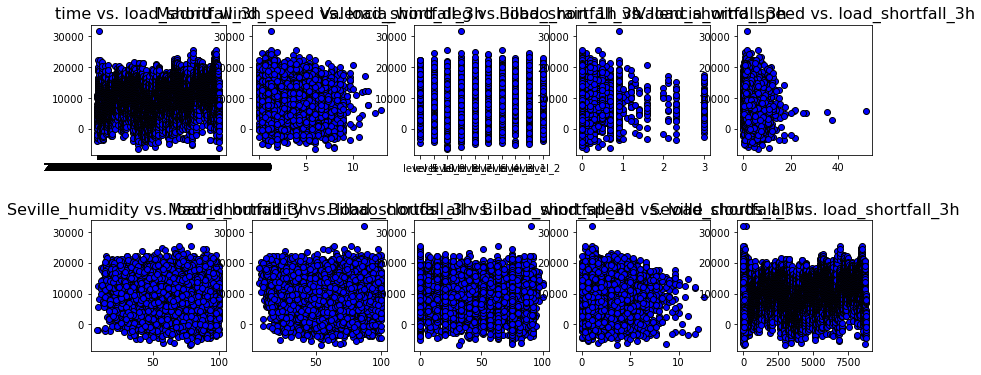

In [131]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,5, figsize=(14,6),)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
axs = axs.ravel()

for index, column in enumerate(df.columns):
    axs[index-1].set_title("{} vs. load_shortfall_3h".format(column),fontsize=16)
    axs[index-1].scatter(x=df[column],y=df['load_shortfall_3h'],color='blue',edgecolor='k')

fig.tight_layout(pad=1)

In [ ]:
from seaborn import pairplot
g = pairplot(df.drop('load_shortfall_3h', axis='columns'))
g.fig.set_size_inches(9,9)

In [ ]:
# We only compare the predictor variables, and thus drop the target `mpg` column.
corr = df.drop('load_shortfall_3h', axis='columns').corr()
from statsmodels.graphics.correlation import plot_corr
fig=plot_corr(corr,xnames=corr.columns)

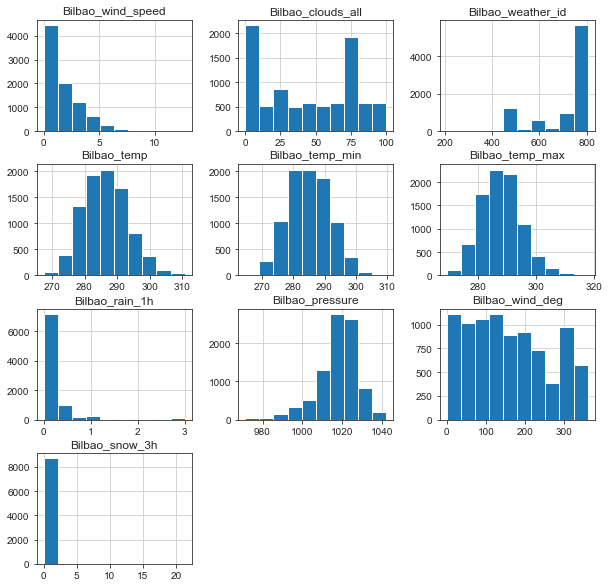

In [102]:
# have a look at feature distributions for Bilbao
features = ['Bilbao_wind_speed',
'Bilbao_clouds_all',
'Bilbao_weather_id',
'Bilbao_temp',
'Bilbao_temp_min',
'Bilbao_temp_max',
'Bilbao_rain_1h',
'Bilbao_pressure',
'Bilbao_wind_deg',
'Bilbao_snow_3h'] # create a list of all numerical features
df[features].hist(figsize=(10,10))
#frequency distributions for the featiures

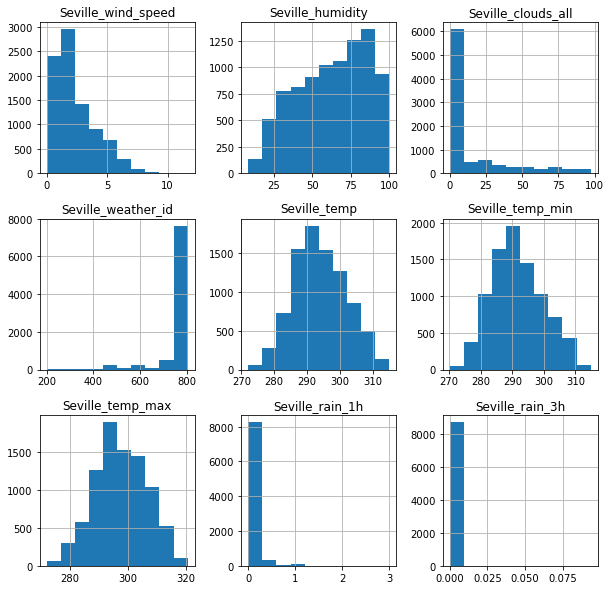

In [6]:
# have a look at feature distributions = predictor v outcome variable eg histogram for each feature
features = ['Seville_wind_speed','Seville_humidity','Seville_clouds_all','Seville_weather_id','Seville_temp','Seville_temp_min','Seville_temp_max','Seville_rain_1h','Seville_rain_3h','Seville_pressure'] # create a list of all numerical features
df[features].hist(figsize=(10,10));
#frequency distributions for the featiures

C:\Users\Amand\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='load_shortfall_3h', ylabel='Density'>

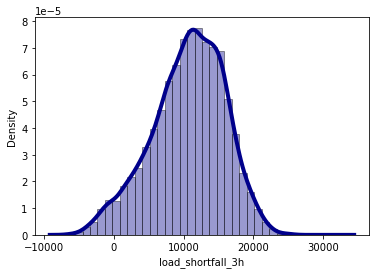

In [8]:
sns.distplot(df['load_shortfall_3h'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

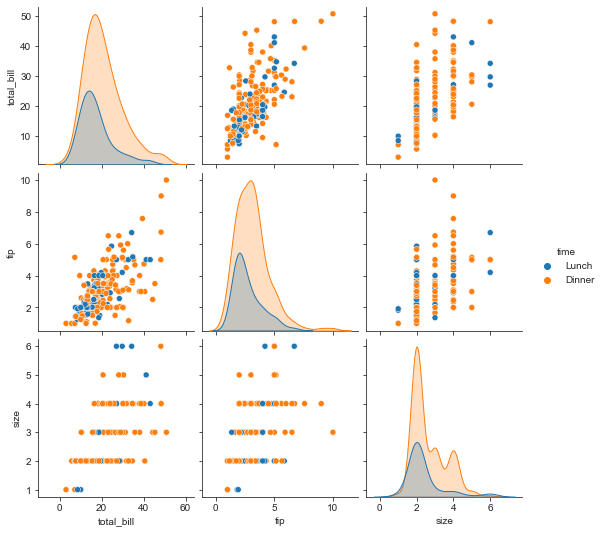

In [22]:
sns.pairplot(df, hue="time")

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

# Regularisation using Lasso

frop loadshortfall because it is our y variable, drop valencia wind deg and seville pressure because they are object dataypes. drop valencia pressure because it is compreised of many null values.

In [15]:
df = pd.read_csv('df_train.csv')
test_df = pd.read_csv('df_test.csv', index_col=0)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [17]:
# remove missing values/ features
X = df.drop(['load_shortfall_3h', "Valencia_pressure", "Valencia_wind_deg", "Seville_pressure", "time"], axis=1)

y = df['load_shortfall_3h'] #target

In [18]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [19]:

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
# create new features

# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Compute and print the coefficients
# Fit the regressor to the data
lasso_coeff = lasso.fit(X, y).coef_
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test, y_test)


0.14321895080169966

In [22]:
# Plot the coefficients
#plt.plot(range(len(df.columns)), lasso_coef)
plt.xticks(range(len(df.columns())), df.columns.values, rotation=60)
plt.margins(0.02)


TypeError: 'Index' object is not callable

In [ ]:
# engineer existing features

# Regularisation using Ridge

In [11]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import metrics

In [23]:
# Create scaler object
scaler = StandardScaler()

In [24]:
# Create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)

In [25]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,...,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,-1.731853,-0.950708,-0.362123,-0.796169,0.516117,0.270621,-1.335491,-0.501451,-0.565065,0.630823,...,-1.394813,-2.420380,-1.354598,-2.338357,-2.505658,-1.218309,-2.621665,-2.125118,-2.405393,-2.309892
1,-1.731458,-1.130863,-0.362123,-0.381412,0.692953,0.298017,-1.335491,-0.501451,-0.565065,0.607959,...,-1.456868,-2.374370,-1.423738,-2.183645,-2.353511,-1.292271,-2.475661,-2.040702,-2.357388,-2.261154
2,-1.731063,-0.770554,-0.362123,-0.657917,0.383491,0.284319,-1.335491,-0.501451,-0.565065,0.542632,...,-1.316350,-1.726058,-1.267176,-1.489980,-1.671342,-1.124792,-1.821036,-1.570279,-1.680968,-1.574407
3,-1.730667,-0.770554,-0.362123,-0.657917,0.118238,-0.044439,-1.335491,-0.501451,-0.565065,0.398912,...,-1.061929,-0.783992,-0.983703,-0.579082,-0.775541,-0.821553,-0.961406,-0.762967,-0.698057,-0.576488
4,-1.730272,-0.770554,-0.362123,-0.657917,-0.161751,-0.017043,-1.274045,-0.894581,-0.565065,0.255192,...,-0.954814,-0.908771,-0.864356,-0.412497,-0.611717,-0.693885,-0.804197,-0.748327,-0.828246,-0.708665


In [34]:
# Split the data into train and test, being sure to use the standardised predictors
X_train, X_test, y_train, y_test = train_test_split(X_standardise,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=False)


Am


In [93]:
# Create ridge model
ridge = Ridge()

In [94]:
# Train the model
ridge.fit(X_train, y_train)

Ridge()

In [95]:
# Extract the model intercept value
b0 = float(ridge.intercept_)

In [96]:
# Extract the model coefficient value
coeff = pd.DataFrame(ridge.coef_, X.columns, columns=['Coefficient'])


In [97]:
print("Intercept:", float(b0))


Intercept: 10532.784999257701


In [98]:
# Check out the coefficients
coeff

,Coefficient
Unnamed: 0,0.265371
Madrid_wind_speed,-481.053625
Bilbao_rain_1h,-125.094588
Valencia_wind_speed,-118.166847
Seville_humidity,-908.162337
Madrid_humidity,18.657086
Bilbao_clouds_all,-172.913826
Bilbao_wind_speed,-64.639729
Seville_clouds_all,96.346288
Bilbao_wind_deg,-366.488294


In [99]:
# Create model object
lm = LinearRegression()

# Train model
lm.fit(X_train, y_train)

LinearRegression()

In [100]:
train_lm = lm.predict(X_train)
train_ridge = ridge.predict(X_train)

print('Training MSE')
print('Linear:', metrics.mean_squared_error(y_train, train_lm))
print('Ridge :', metrics.mean_squared_error(y_train, train_ridge))

Training MSE
Linear: 23304654.076129884
Ridge : 23306705.882559713


In [101]:
test_lm = lm.predict(X_test)
test_ridge = ridge.predict(X_test)

print('Testing MSE')
print('Linear:', metrics.mean_squared_error(y_test, test_lm))
print('Ridge :', metrics.mean_squared_error(y_test, test_ridge))

Testing MSE
Linear: 23373462.796561636
Ridge : 23343093.110502653


# Temp of each city Model

In [9]:
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,...,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,...,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,...,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,...,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,...,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,...,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [44]:
# Create scaler object
scaler = StandardScaler()

In [45]:
X_scaled = scaler.fit_transform(X)

In [46]:
X = df[['Barcelona_temp', 'Madrid_temp', 'Seville_temp', 'Bilbao_temp', 'Valencia_temp']]
y = df['load_shortfall_3h']

In [47]:
# Convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)
X_standardise.head()

,Barcelona_temp,Madrid_temp,Seville_temp,Bilbao_temp,Valencia_temp
0,-1.354598,-2.405393,-2.490266,-2.505658,-2.890888
1,-1.423738,-2.357388,-2.403108,-2.353511,-2.633926
2,-1.267176,-1.680968,-1.917409,-1.671342,-1.757012
3,-0.983703,-0.698057,-1.083879,-0.775541,-0.794849
4,-0.864356,-0.828246,-1.068764,-0.611717,-1.057970


In [48]:
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [49]:
# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.03245087841974026
Root Mean Squared Error: 5193.55805149226


In [ ]:
#no scaling and scaling gave same result
R^2: 0.03245087841974026
Root Mean Squared Error: 5193.55805149226

# Multicolinearity test

In [73]:
# import regression module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

######################MANIPULATE X 

# split predictors and response
X = df.drop(['load_shortfall_3h', "Valencia_pressure", "Valencia_wind_deg", "Seville_pressure", "time"], axis=1)
y = df['load_shortfall_3h'] #target

scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)


# create model object
lm = LinearRegression()
# import train/test split module

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)
# train model
lm.fit(X_train, y_train)



# extract model intercept
beta_0 = float(lm.intercept_)
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

print("Intercept:", beta_0)

beta_js

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Intercept: 10674.918476574274
R^2: 0.15380972954333394
Root Mean Squared Error: 4755.138873376868


# Madrid features vs predictor

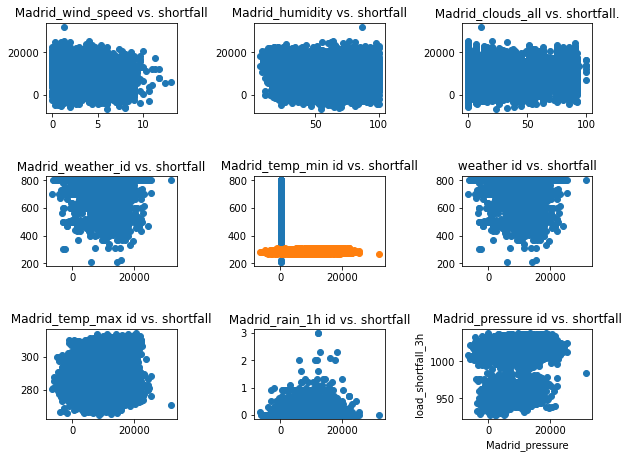

In [99]:
import matplotlib.pyplot as plt
from matplotlib import rc


fig, axs = plt.subplots(3, 3, figsize=(9,7))


axs[0,0].scatter(df['Madrid_wind_speed'], df['load_shortfall_3h'])
axs[0,0].title.set_text(' Madrid_wind_speed vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_wind_speed")


axs[0,1].scatter(df['Madrid_humidity'], df['load_shortfall_3h'])
axs[0,1].title.set_text(' Madrid_humidity vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_humidity")


axs[0,2].scatter(df['Madrid_clouds_all'], df['load_shortfall_3h'])
axs[0,2].title.set_text(' Madrid_clouds_all vs. shortfall. ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_clouds_all")


axs[1,0].scatter(df['load_shortfall_3h'], df['Madrid_weather_id'])
axs[1,0].title.set_text(' Madrid_weather_id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_weather_id")

axs[1,1].scatter(df['Madrid_temp'], df['Madrid_weather_id'])
axs[1,1].title.set_text(' Madrid_temp id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_temp")

axs[1,1].scatter(df['load_shortfall_3h'], df['Madrid_temp_min'])
axs[1,1].title.set_text(' Madrid_temp_min id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_temp_min")

axs[1,2].scatter(df['load_shortfall_3h'], df['Madrid_weather_id'])
axs[1,2].title.set_text(' weather id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_weather_id")

axs[2,0].scatter(df['load_shortfall_3h'], df['Madrid_temp_max'])
axs[2,0].title.set_text(' Madrid_temp_max id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_temp_max") 

axs[2,1].scatter(df['load_shortfall_3h'], df['Madrid_rain_1h'])
axs[2,1].title.set_text(' Madrid_rain_1h id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_rain_1h")

axs[2,2].scatter(df['load_shortfall_3h'], df['Madrid_pressure'])
axs[2,2].title.set_text(' Madrid_pressure id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_pressure")

fig.tight_layout(pad=3.0)

plt.show()

# Valencia features v predictors

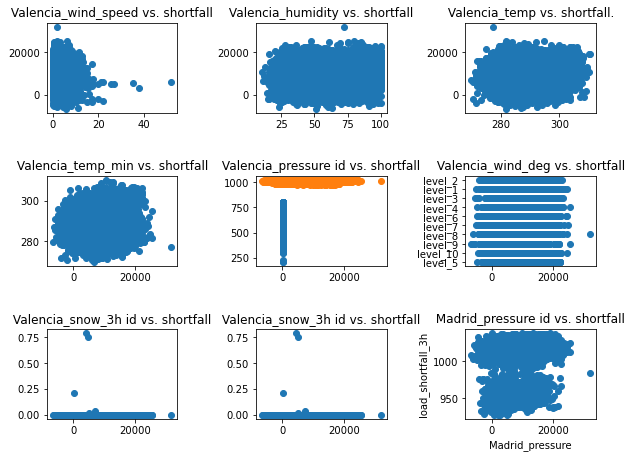

In [102]:
import matplotlib.pyplot as plt
from matplotlib import rc


fig, axs = plt.subplots(3, 3, figsize=(9,7))


axs[0,0].scatter(df['Valencia_wind_speed'], df['load_shortfall_3h'])
axs[0,0].title.set_text(' Valencia_wind_speed vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_wind_speed")


axs[0,1].scatter(df['Valencia_humidity'], df['load_shortfall_3h'])
axs[0,1].title.set_text(' Valencia_humidity vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_humidity")


axs[0,2].scatter(df['Valencia_temp'], df['load_shortfall_3h'])
axs[0,2].title.set_text(' Valencia_temp vs. shortfall. ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_temp")


axs[1,0].scatter(df['load_shortfall_3h'], df['Valencia_temp_min'])
axs[1,0].title.set_text(' Valencia_temp_min vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_temp_min")

axs[1,1].scatter(df['Valencia_temp_max'], df['Madrid_weather_id'])
axs[1,1].title.set_text(' Valencia_temp_max id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_temp_max")

axs[1,1].scatter(df['load_shortfall_3h'], df['Valencia_pressure'])
axs[1,1].title.set_text(' Valencia_pressure id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_pressure")

axs[1,2].scatter(df['load_shortfall_3h'], df['Valencia_wind_deg'])
axs[1,2].title.set_text(' Valencia_wind_deg vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_wind_deg")

axs[2,0].scatter(df['load_shortfall_3h'], df['Valencia_snow_3h'])
axs[2,0].title.set_text(' Valencia_snow_3h id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_snow_3h") 

axs[2,1].scatter(df['load_shortfall_3h'], df['Valencia_snow_3h'])
axs[2,1].title.set_text(' Valencia_snow_3h id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Valencia_snow_3h")

axs[2,2].scatter(df['load_shortfall_3h'], df['Madrid_pressure'])
axs[2,2].title.set_text(' Madrid_pressure id vs. shortfall ')
plt.ylabel('load_shortfall_3h')
plt.xlabel("Madrid_pressure")

fig.tight_layout(pad=3.0)

plt.show()

# COMPARING CITIES

In [129]:
# import regression module
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

######################MANIPULATE X 

# split predictors and response
#MADRIDX = df[['Madrid_wind_speed' , 'Madrid_humidity','Madrid_clouds_all','Madrid_weather_id', 'Madrid_temp' ,'Madrid_temp_min','Madrid_temp_max','Madrid_rain_1h','Madrid_pressure']]
#Xvalencia = df[['Valencia_wind_speed','Valencia_humidity','Valencia_temp', 'Valencia_temp_min','Valencia_temp_max','Valencia_snow_3h']]
#XBILBAO = df[['Bilbao_wind_speed','Bilbao_clouds_all','Bilbao_weather_id','Bilbao_temp','Bilbao_temp_min','Bilbao_temp_max','Bilbao_rain_1h','Bilbao_pressure','Bilbao_wind_deg','Bilbao_snow_3h']]
#XSEVILLE= df[['Seville_wind_speed','Seville_humidity','Seville_clouds_all','Seville_weather_id','Seville_temp','Seville_temp_min','Seville_temp_max','Seville_rain_1h','Seville_rain_3h']]
#XBARCELONA = df[['Barcelona_wind_speed','Barcelona_weather_id','Barcelona_temp','Barcelona_temp_min','Barcelona_temp_max','Barcelona_rain_1h','Barcelona_rain_3h','Barcelona_pressure','Barcelona_wind_deg']]

y = df['load_shortfall_3h'] #target

scaler = StandardScaler()
# create scaled version of the predictors (there is no need to scale the response)
X_scaled = scaler.fit_transform(X)
# convert the scaled predictor values into a dataframe
X_standardise = pd.DataFrame(X_scaled,columns=X.columns)


# create model object
lm = LinearRegression()
# import train/test split module

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.20,
                                                    random_state=1)
# train model
lm.fit(X_train, y_train)



# extract model intercept
beta_0 = float(lm.intercept_)
# extract model coeffs
beta_js = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

print("Intercept:", beta_0)

beta_js

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Intercept: 10676.11768063912
R^2: 0.08014361177932883
Root Mean Squared Error: 4957.802311705957


<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

test = 20%, treain = 80%

In [ ]:
# split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [ ]:
# create targets and features dataset

In [ ]:
# create one or more ML models


In [ ]:
# evaluate one or more ML models


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic